# STAT 301 Group 24 Project Proposal #

### By Selena Shew, Jasmeher Kathuria, Kratika Rathi, Alex Bastin ###

### November 9, 2022 ###

## 1. Introduction ##

Through this STAT 301 project, we attempt to build a model to analyze student performance based on many factors such as their study time, relationship status and absences etc. 

This dataset was obtained from the UCI Machine Learning Repository and it was collected through school reports and questionnaires. 

The statistical question that we’ll be answering through this project is whether certain factors such as internet access, study time, relationship status, going out with friends and their absences have an impact on whether or not a student fails a class. Our model is based on inference - understanding what factors lead to a student failing in class.

You will see that the original dataset contained many variables. After doing some research, we only focused on variables that previous studies have shown to affect a student’s performance. Thwala C’s How Close Relationships in Higher Education Impact Students’ Life and Markus Klein’s School Absenteeism and Academic Achievement are few of the many studies we looked over before deciding on our variables. These studies have been cited below. A brief description of the variables that we’ve chosen to include in our model:


-Romantic : Whether or not a student is involved in a romantic relationship (categorical - binary variable)

-Studytime : Weekly study time (measured in hours - continuous variable)

-Goout : going out with friends ( based on a scale from 1-5 with 1 being low)

-Internet : whether or not the student has access to the internet (categorical - binary variable)

-Absences : Number of school absences. (Continuous variable)

-Failure - Whether or not the student failed the class. (Binary variable)



## 2. Preliminary Results ##

In [28]:
library(broom)
library(tidyverse)
library(GGally)
library(ggplot2)

In [44]:
temp <- tempfile(fileext = ".zip")
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip",
  temp)
out <- unzip(temp, exdir = tempdir())
data <- read.csv(out[2], sep = ";") # out[2] represents the portugese csv, math csv is index 1 i think
#as a group we have decided to use the portugese dataset only
head(data)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,4,0,11,11
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,2,9,11,11
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,6,12,13,12
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,0,14,14,14
5,GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,0,11,13,13
6,GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,6,12,12,13


In [45]:
apply(data, 2, function(x) any(is.na(x))) # Check missing values

school        sex        age    address    famsize    Pstatus       Medu 
     FALSE      FALSE      FALSE      FALSE      FALSE      FALSE      FALSE 
      Fedu       Mjob       Fjob     reason   guardian traveltime  studytime 
     FALSE      FALSE      FALSE      FALSE      FALSE      FALSE      FALSE 
  failures  schoolsup     famsup       paid activities    nursery     higher 
     FALSE      FALSE      FALSE      FALSE      FALSE      FALSE      FALSE 
  internet   romantic     famrel   freetime      goout       Dalc       Walc 
     FALSE      FALSE      FALSE      FALSE      FALSE      FALSE      FALSE 
    health   absences         G1         G2         G3 
     FALSE      FALSE      FALSE      FALSE      FALSE

In [2]:
#Since all the results are FALSE in the above code snippet, this confirms we don't have any missing/NA values in our dataset

In [46]:
colnames(data) #checking the column names within the data

[1] "school"     "sex"        "age"        "address"    "famsize"   
 [6] "Pstatus"    "Medu"       "Fedu"       "Mjob"       "Fjob"      
[11] "reason"     "guardian"   "traveltime" "studytime"  "failures"  
[16] "schoolsup"  "famsup"     "paid"       "activities" "nursery"   
[21] "higher"     "internet"   "romantic"   "famrel"     "freetime"  
[26] "goout"      "Dalc"       "Walc"       "health"     "absences"  
[31] "G1"         "G2"         "G3"

In [47]:
data_prelim <- data %>%
    select(failures, romantic, studytime, goout, internet, absences)
    

#selecting a few variables to examine during preliminary analysis as there are too many variables to plot via ggpairs()
#we will do a formal model selection later to pick the actual significant variables

In [48]:
head(data_prelim)

,failures,romantic,studytime,goout,internet,absences
,<int>,<chr>,<int>,<int>,<chr>,<int>
1,0,no,2,4,no,4
2,0,no,2,3,yes,2
3,0,no,2,2,yes,6
4,0,yes,3,2,yes,0
5,0,no,2,2,no,0
6,0,no,2,2,yes,6


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



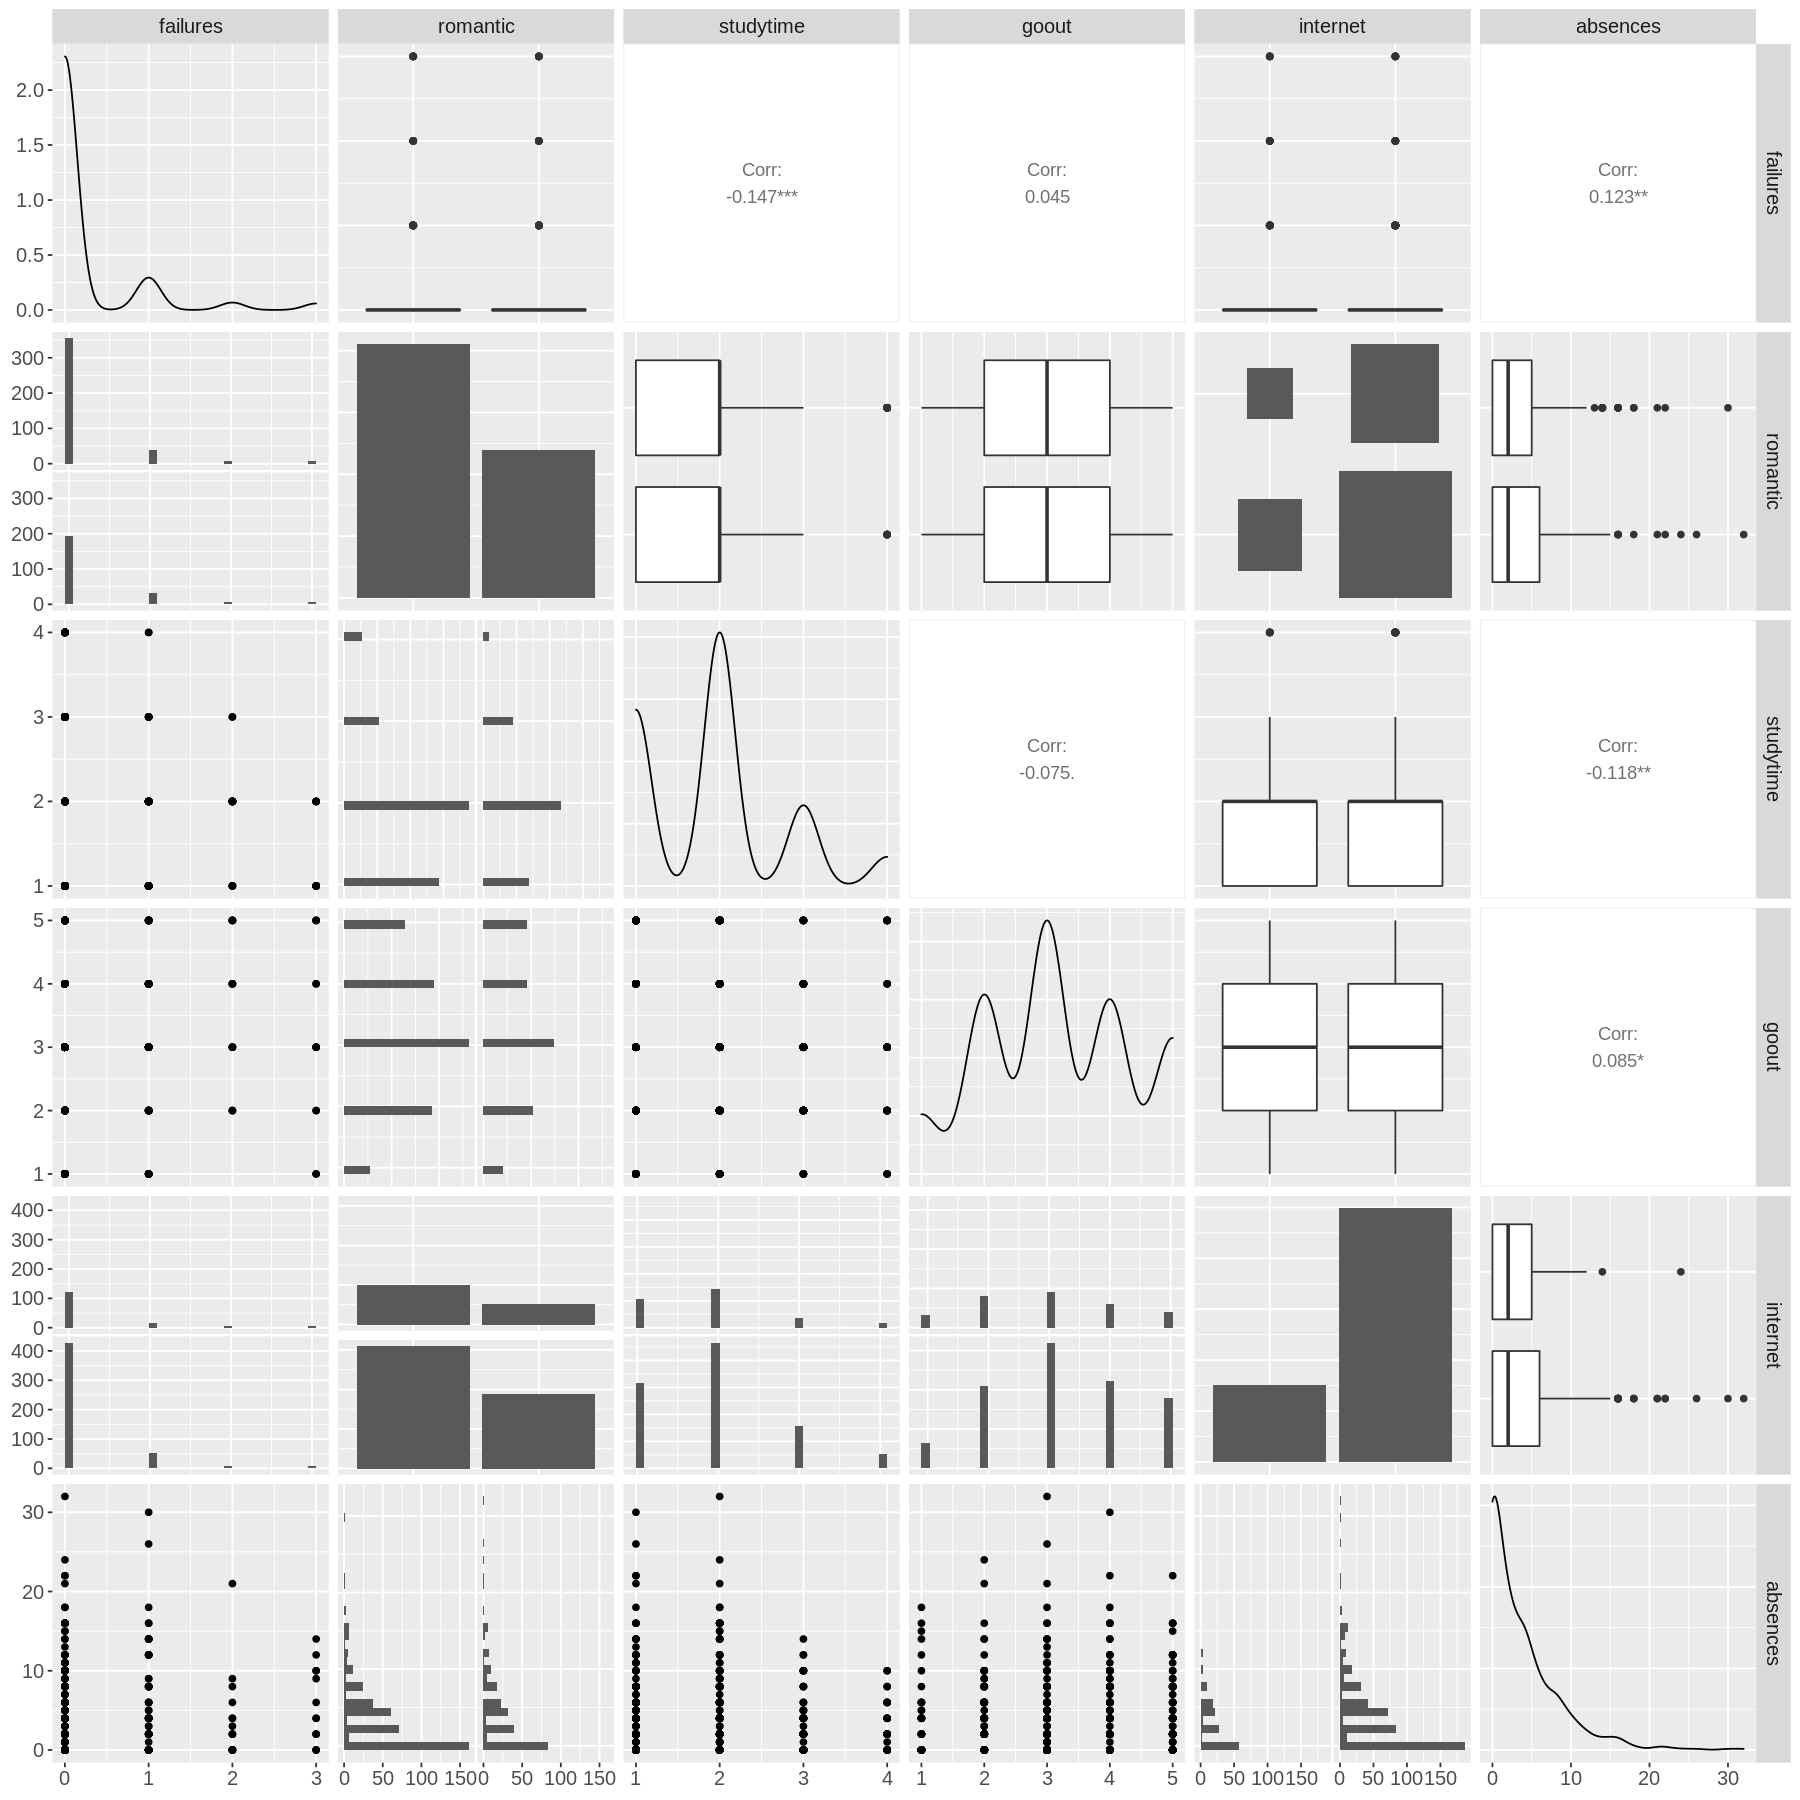

In [50]:
#visualizing the relationships in the data

options(repr.plot.width = 15, repr.plot.height = 15)

student_perform_pairplots <- data_prelim %>%
  ggpairs(progress = FALSE) +
  theme(
    text = element_text(size = 15),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )
student_perform_pairplots

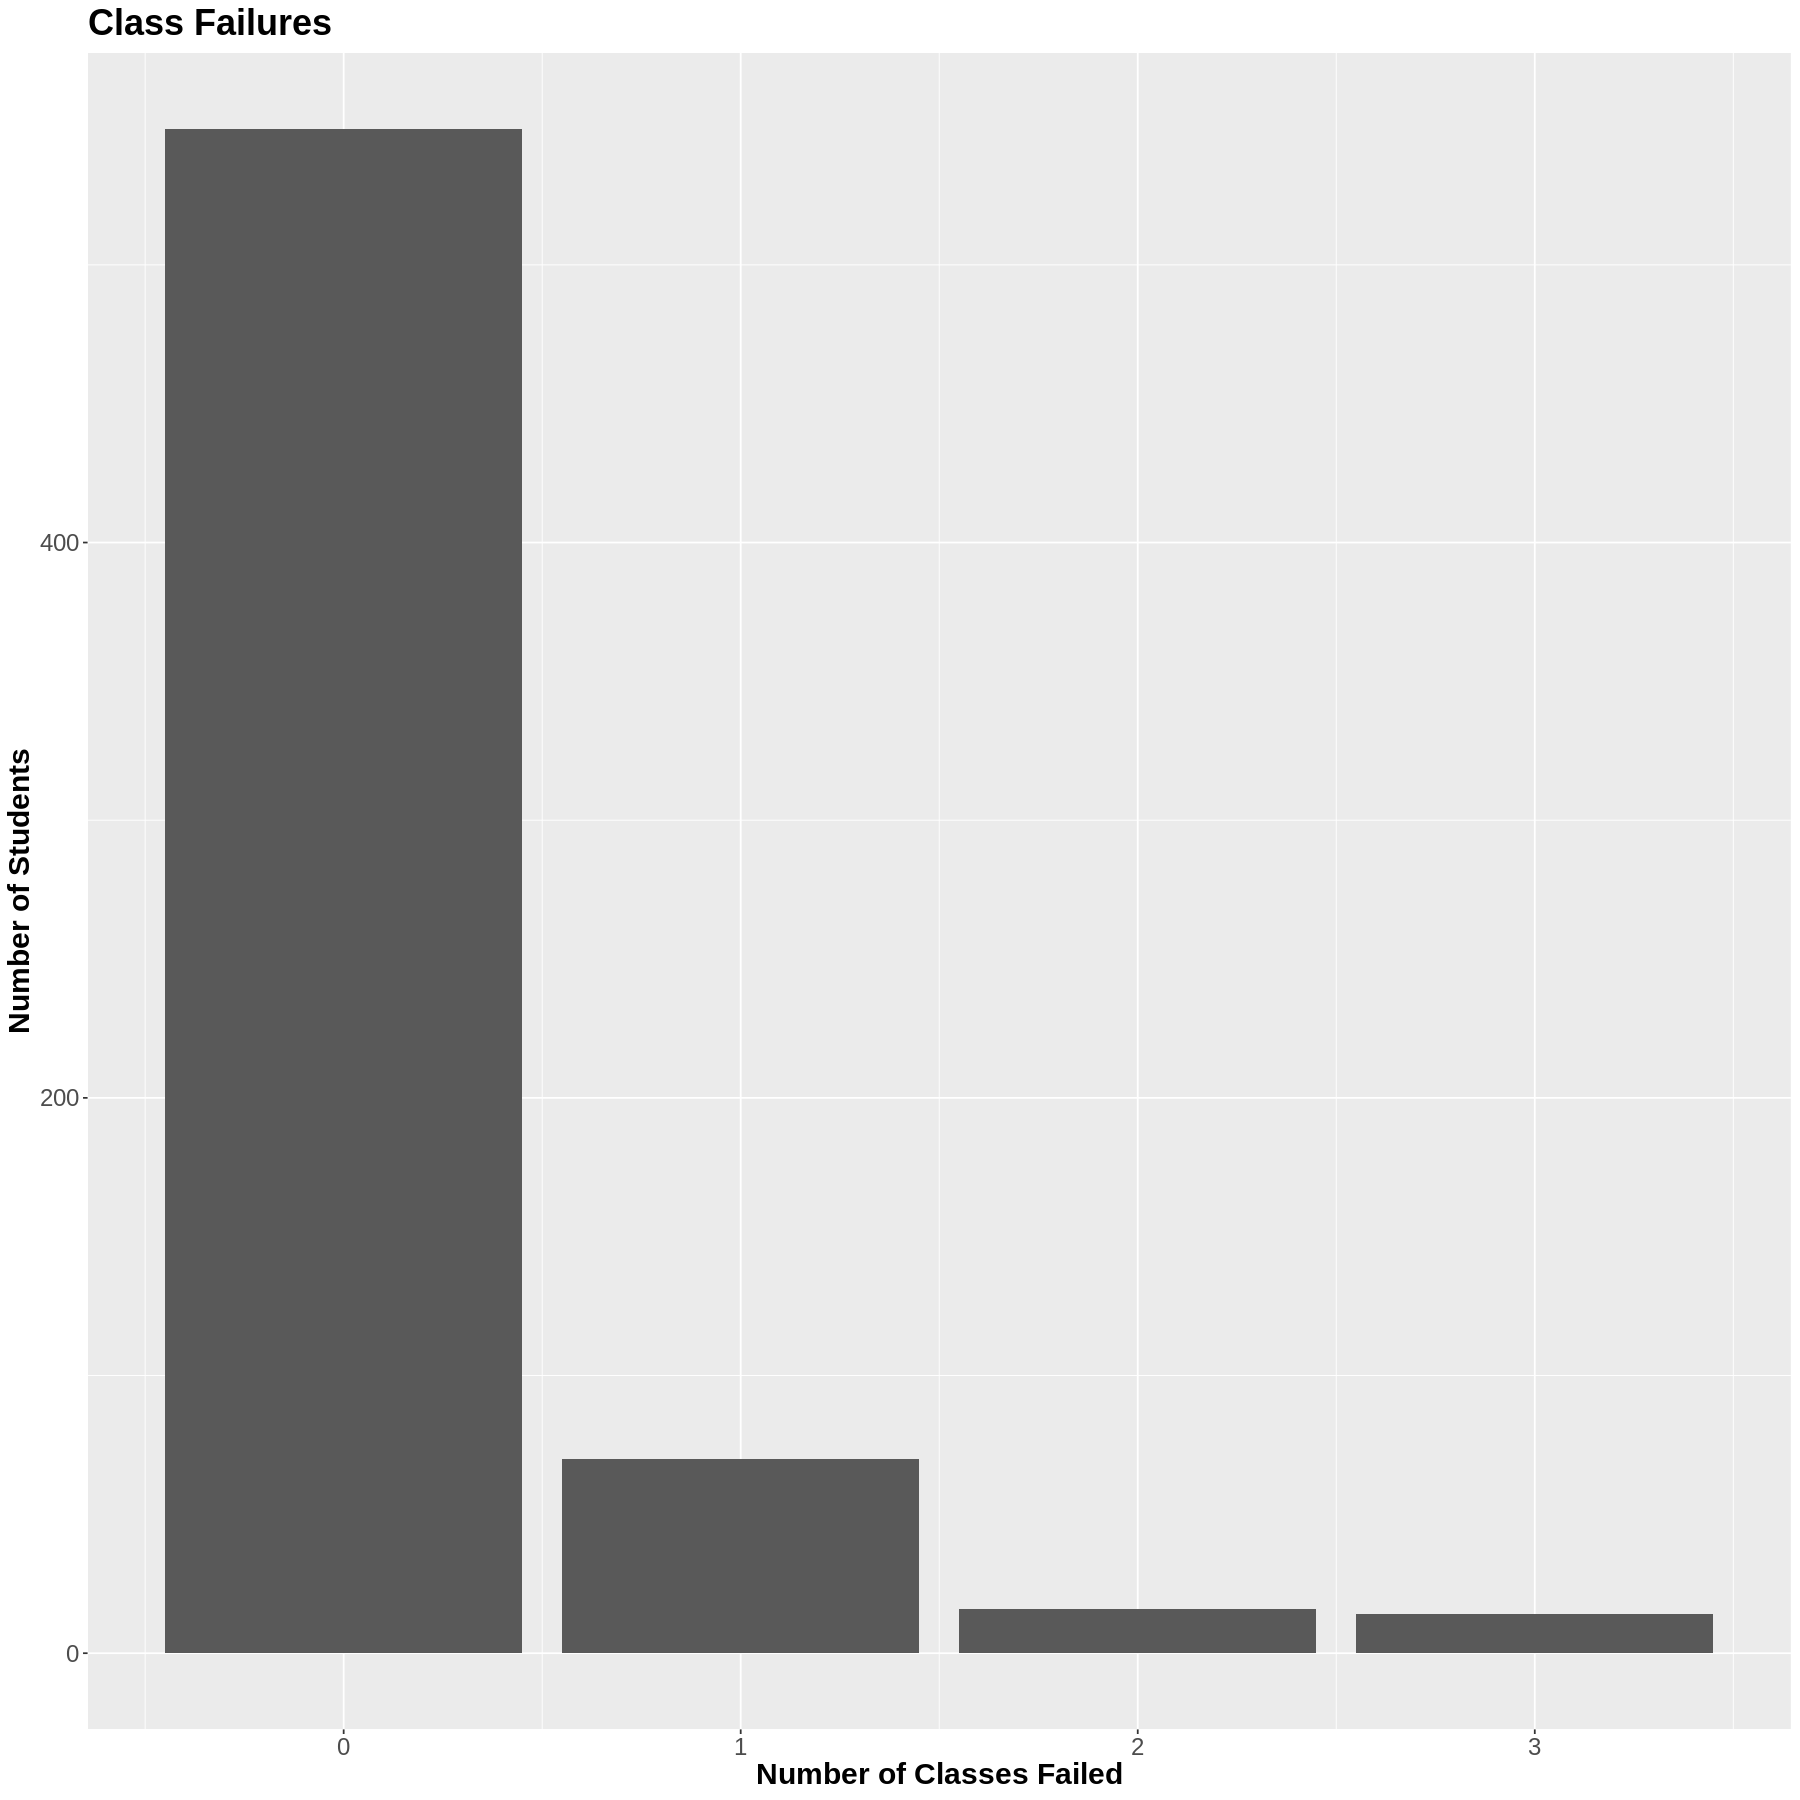

In [49]:
#visualizing failures

fail_plot <- data_prelim %>%
  ggplot(aes(x = failures)) +
  geom_bar() +
  theme(
    text = element_text(size = 18),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  ) +
  ggtitle("Class Failures") +
  xlab("Number of Classes Failed") +
  ylab("Number of Students")

fail_plot 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



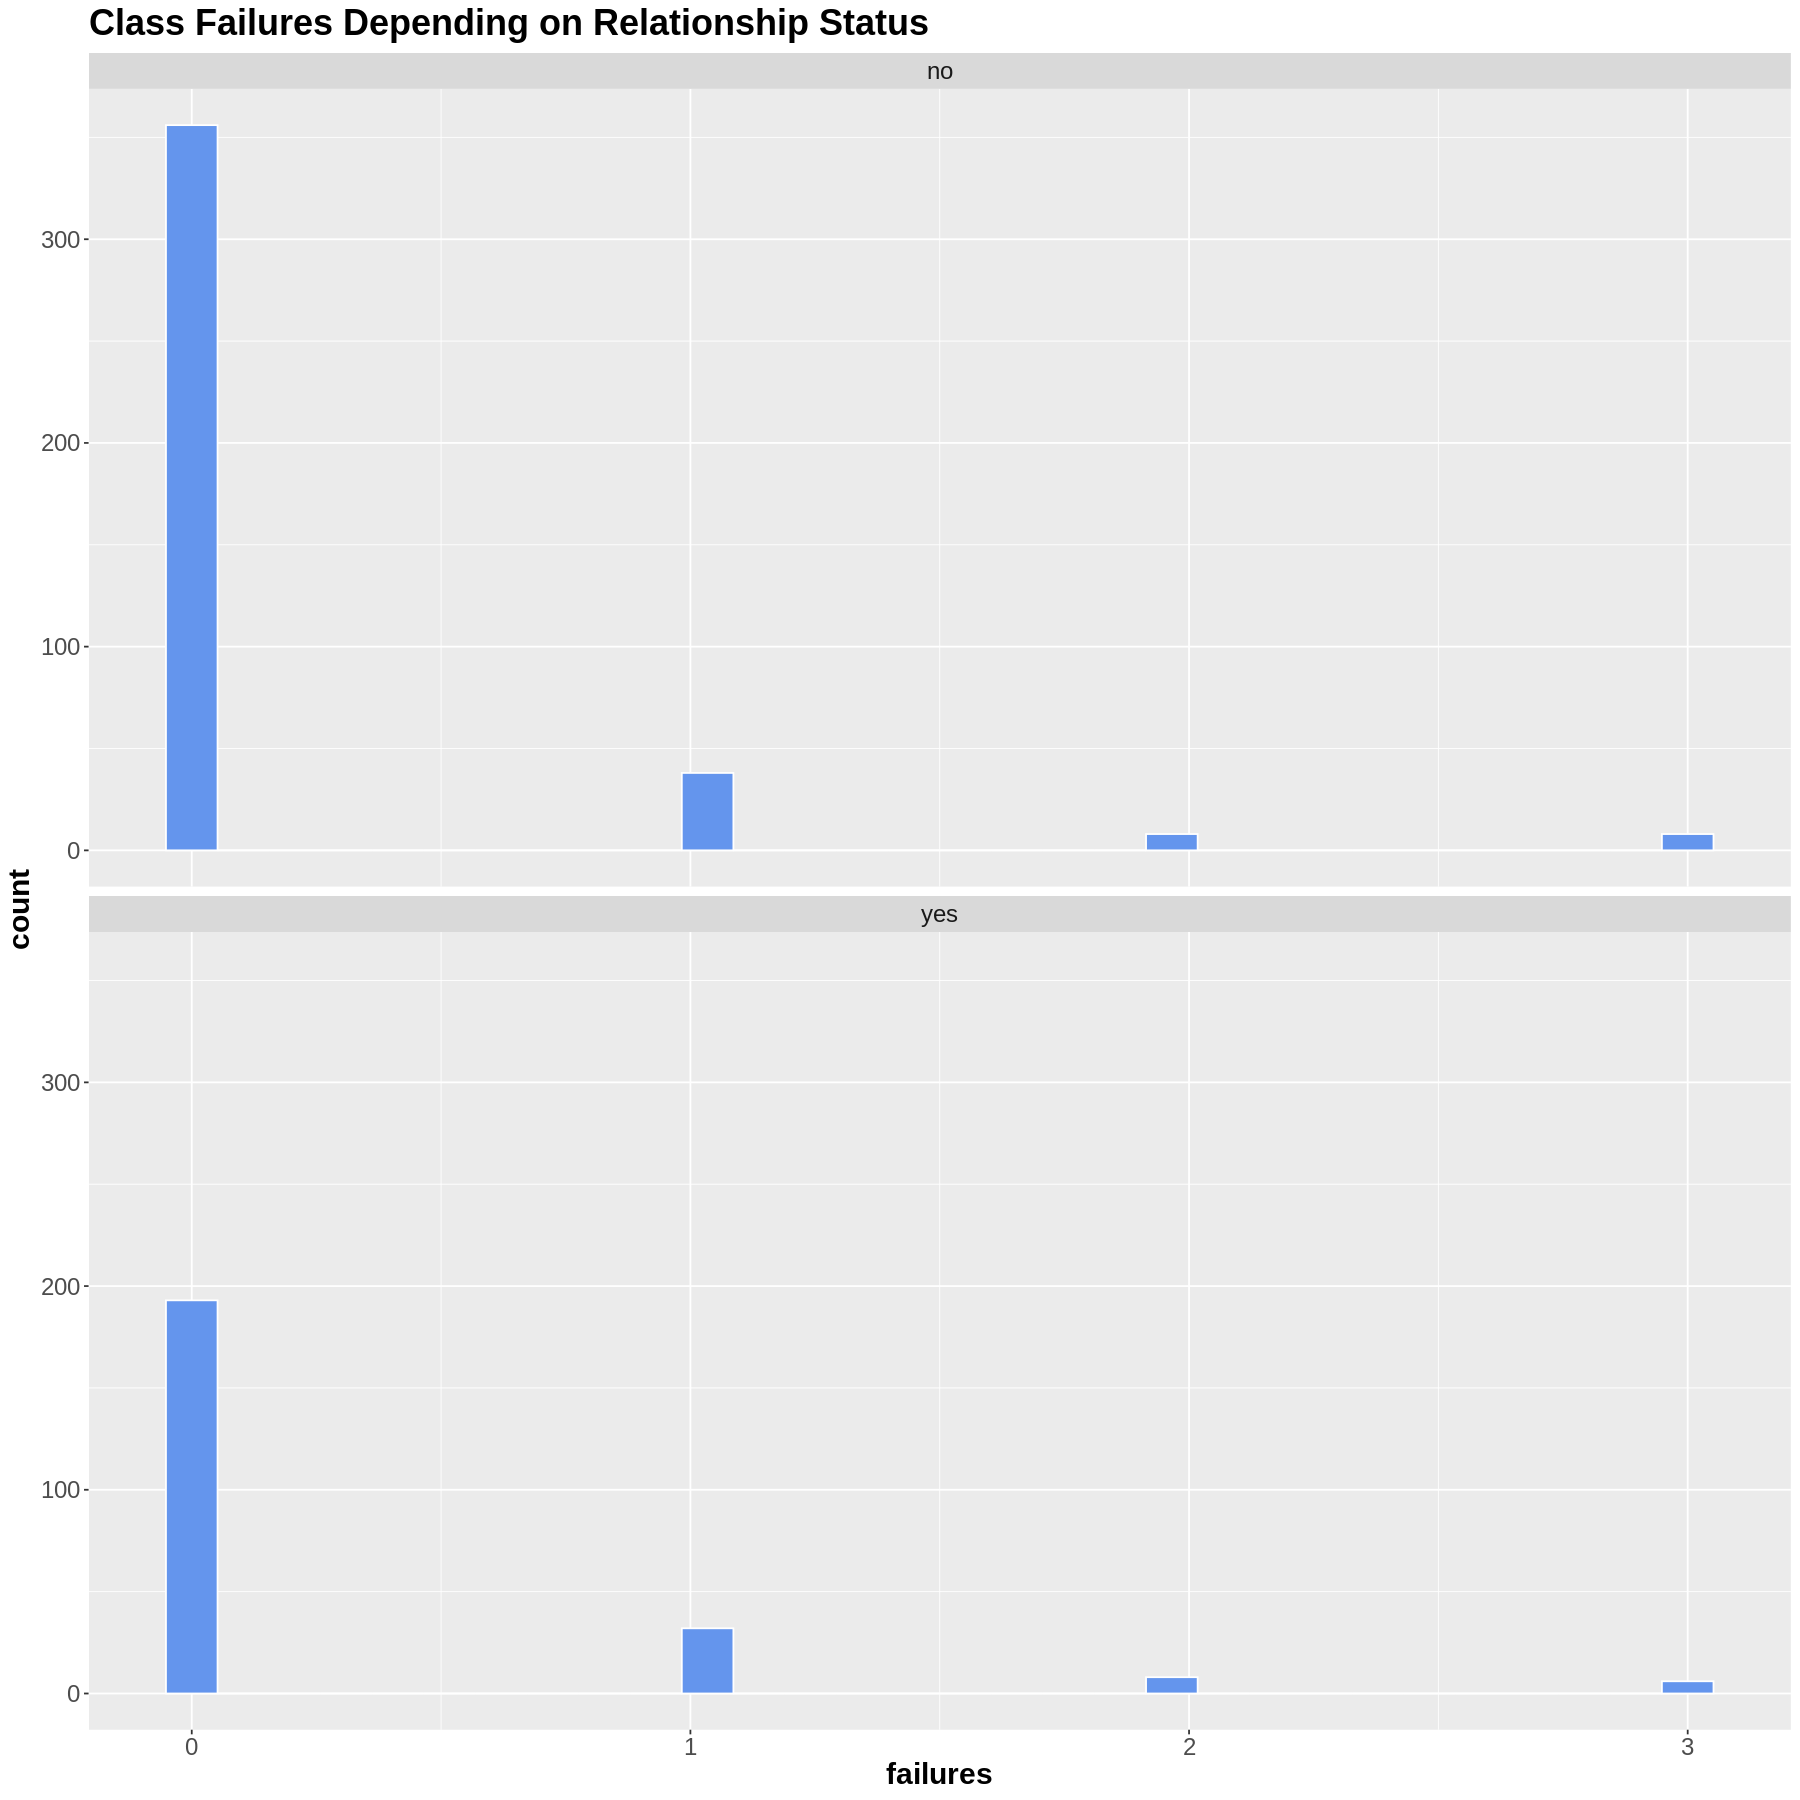

In [58]:
#visualizing the number of class failures depending on whether the student is in a relationship or not

fail_rom_plot <- data_prelim %>%
  ggplot(aes(x = failures)) +
  geom_histogram(fill = "cornflowerblue",
                 color = "white") +
  facet_wrap(~romantic, ncol = 1) +
  labs(title = "Class Failures Depending on Relationship Status") +
  theme(
    text = element_text(size = 18),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )

fail_rom_plot

## 3. Methods ##

The final report will be trustworthy due to the research, time, and analysis that will be used to determine our final results. The sources that we have used to support our research are peer-reviewed and give us a strong understanding behind the factors affecting student performance.

Our main goal for the project is to create a model in order to try to predict the number of classes failed by a student depending on the various explanatory variables. In order to determine this, we will first conduct a model selection process using regsusbsets() and summary() to determine the number of variables as well as which variables to use. Additionally, we will split our data into test and training data. After deciding on the best model, we will create it using lm() and train it. Finally, we will test our model and evaluate the significance of the model’s results. 

We expect to achieve a model that will accurately predict the number of classes a student has failed. We hope that the impact of our results will be that the main variables that affect student performance will be quite clear.


## References ##

C., Thwala & L.S., Motolla & Lebelo, Ramoshweu & S., Khumalo & M.R., Mabunda. (2021). HOW CLOSE RELATIONSHIPS IN HIGHER EDUCATION IMPACT STUDENTS' LIVES: FRIENDSHIPS AND ROMANTIC RELATIONSHIPS.

Klein, M., Sosu, E. M., & Dare, S. (2022). School Absenteeism and Academic Achievement: Does the Reason for Absence Matter? AERA Open, 8. https://doi.org/10.1177/23328584211071115
